In [175]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

## Load the dataset

In [176]:
data = pd.read_csv(r"Housing.csv")
data  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [177]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Data Preprocessing

In [178]:
# Convert categorical to numerical features

categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
cat_encodes = {'yes': 1,
               'no': 0}
furnished_stat = ['furnishingstatus']
f_encodes = {
    'furnished': 1,
    'semi-furnished' : 0,
    'unfurnished': -1
}

# Replace all 'yes' with 1 and 'no' with 0 in categorical columns
data[categorical] = data[categorical].replace(cat_encodes)
data[furnished_stat] = data[furnished_stat].replace(f_encodes)

# Display the updated dataframe
data

/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_31169/388020242.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[categorical] = data[categorical].replace(cat_encodes)
/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_31169/388020242.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[furnished_stat] = data[furnished_stat].replace(f_encodes)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [179]:
def test_train_val_split(data, train_split, test_split, val_split):
    
    cols = data.columns
    data = np.array(data)
    
    num_samples = len(data)
    
    indices = np.random.permutation(num_samples)
    
    train_split_indx = int(num_samples * train_split)
    test_split_indx = train_split_indx + int(num_samples * test_split)
    val_split_indx = test_split_indx + int(num_samples*val_split)
    
    train  = data[indices[:train_split_indx]]
    test = data[indices[train_split_indx: test_split_indx]]
    validation = data[indices[test_split_indx: val_split_indx]]
    
    # # Convert numpy arrays back to DataFrames
    # train_df = pd.DataFrame(train, columns=cols)
    # test_df = pd.DataFrame(test, columns=cols)
    # validation_df = pd.DataFrame(validation, columns=cols)
    
    return train, test, validation
    
train, test, valid = test_train_val_split(data, 0.7, 0.2, 0.1)

In [180]:
# Standardize

def standardize(train, test, valid):
    mean = np.mean(train, axis = 0)
    stdev = np.std(train, axis = 0)
    
    train = (train-mean)/stdev    
    test = (test-mean)/stdev   
    valid = (valid-mean)/stdev   
    
    return train, test, valid


train, test, valid = standardize(train, test, valid)

In [181]:
def split_features_target(data):
    target = data[:, len(data[0])-1]
    features = data[:, 0:len(data[0]) - 1]
    return features, target

X, y = split_features_target(train)


In [189]:
train[:, 0]

array([ 1.67639576,  0.15155614,  0.89767719,  0.11171472, -0.5003943 ,
        0.37249489, -0.56921129,  0.19139755,  0.15517808,  0.5354825 ,
       -0.97668031, -0.71408916, -1.16683252, -0.60543076, -0.64165023,
        0.62240923,  0.80712852,  0.98822586, -0.64165023,  0.73468958,
       -0.35189448,  0.66225064, -0.08024846,  3.88578334,  2.12913912,
        0.75279931, -0.96762544,  0.75279931,  0.40509242, -0.24323607,
       -0.8408573 ,  2.55652885, -0.27945554,  0.25297065, -0.89518651,
        0.44493383, -0.42433341, -1.22116172,  0.44493383,  0.08273915,
        0.95200639, -1.20667394,  0.89767719, -0.46055288,  0.69484816,
       -0.56921129, -0.82274757, -0.64165023,  0.44493383, -1.18494225,
       -0.13457767,  1.1693232 , -1.23927146, -0.64165023, -0.67786969,
       -0.91329624,  2.03859045, -1.05817411,  0.51737277, -0.13457767,
        1.89371257, -0.42433341, -1.14872279, -0.53299182, -0.37905908,
       -0.46055288,  0.01030021,  1.70899328,  2.25590726,  1.98

In [182]:
class LinearRegression:
    def __init__(self, learning_rate, stopping_threshold):
        self.learning_rate = learning_rate
        self.stopping_threshold = stopping_threshold
        self.W = None
        self.B = None
        
    def initialise_params(self, n_features):
        self.W = np.random.randn(n_features)*0.01
        self.B = 0
        
    def forward_pass(self, X):
        return np.dot(X, self.W) + self.B
    
    def mse_error_fn(self, predictions, y):
        m = len(predictions)
        error = np.sum(np.square(predictions - y))/(2 * m)
        return error
    
    def backprop(self, predictions, y):
        m = len(predictions)
        
        self.dl_dw = np.dot((predictions - y), self.X)/m
        self.dl_db = np.sum(predictions - y)/m
        
    
    def fitting(self, X, y, iters):
        
        self.X = X
        self.y = y
        
        self.initialise_params(X.shape[1])
        
        costs = []
        
        for i in range(iters):
            predictions = self.forward_pass(X)
            
            cost = self.mse_error_fn(predictions, y)
            
            self.backprop(predictions, y)
            
            self.W -= self.learning_rate*self.dl_dw
            self.B -= self.learning_rate*self.dl_db
            
            costs.append(cost)
            
            
            if i % 10 == 0:
                print(f"Iteration: {i}  Loss: {cost}")
                
            if i > 0 and abs(costs[-1] - costs[-2]) < self.stopping_threshold:
                print(f"Converged after {i} iterations")
                break  
            
        return costs
            
    def plot_lc(self, costs):
        plt.plot(costs)
        plt.title('Learning Curve (Cost vs. Iterations)')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
        
    def plot(self, data_x, data_y):
        # Get the predictions from the model
        preds = self.forward_pass(data_x)
        
        # Sort the data_x, data_y, and preds for smooth plotting
        sorted_indices = np.argsort(data_x[:, 0])  # Sorting based on the feature values
        sorted_data_x = data_x[sorted_indices]
        sorted_data_y = data_y[sorted_indices]
        sorted_preds = preds[sorted_indices]
        
        # Plot the actual data points (true values) as red dots, sorted by feature values
        plt.plot(sorted_data_x[:, 4], sorted_data_y, 'ro', label='Actual Data')  # Plot data_y against sorted data_x
        
        # Plot the regression line (predictions) based on sorted data_x
        plt.plot(sorted_data_x[:, 0], sorted_preds, label='Regression Line', color='blue')  # Plot preds against sorted data_x
        
        # Set the title and labels
        plt.title('Linear Regression')
        plt.xlabel('Feature Values')
        plt.ylabel('Predicted/Target Values')
        
        # Show the legend
        plt.legend()
        
        # Display the plot
        plt.show()


     
            
    def evaluate(self, data_x, data_y):
        preds = self.forward_pass(data_x)
        cost = self.mse_error_fn(preds, data_y)
        
        print(f"Loss: {cost}")
        
        

In [183]:
lr = LinearRegression(0.1, 1e-150)

losses = lr.fitting(*split_features_target(train), 600)

Iteration: 0  Loss: 0.5074078882137418
Iteration: 10  Loss: 0.44841622743696685
Iteration: 20  Loss: 0.4470827078747588
Iteration: 30  Loss: 0.44663157509388457
Iteration: 40  Loss: 0.44639327352136166
Iteration: 50  Loss: 0.4462493831811409
Iteration: 60  Loss: 0.4461590540138138
Iteration: 70  Loss: 0.446101611663736
Iteration: 80  Loss: 0.4460648923807832
Iteration: 90  Loss: 0.44604136046717846
Iteration: 100  Loss: 0.44602625816772984
Iteration: 110  Loss: 0.44601655718219574
Iteration: 120  Loss: 0.4460103221006069
Iteration: 130  Loss: 0.44600631307010596
Iteration: 140  Loss: 0.44600373464992976
Iteration: 150  Loss: 0.44600207602191977
Iteration: 160  Loss: 0.44600100893302996
Iteration: 170  Loss: 0.44600032235250453
Iteration: 180  Loss: 0.44599988056865936
Iteration: 190  Loss: 0.4459995962879321
Iteration: 200  Loss: 0.44599941335222165
Iteration: 210  Loss: 0.44599929562984375
Iteration: 220  Loss: 0.4459992198722446
Iteration: 230  Loss: 0.44599917111961535
Iteration: 24

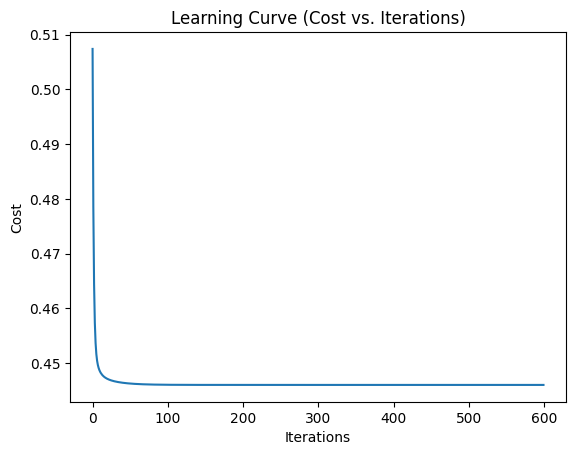

In [184]:
lr.plot_lc(losses)

In [185]:
lr.evaluate(*split_features_target(test))


Loss: 0.5612729181471404


In [186]:
lr.evaluate(*split_features_target(valid))

Loss: 0.5296590721724661


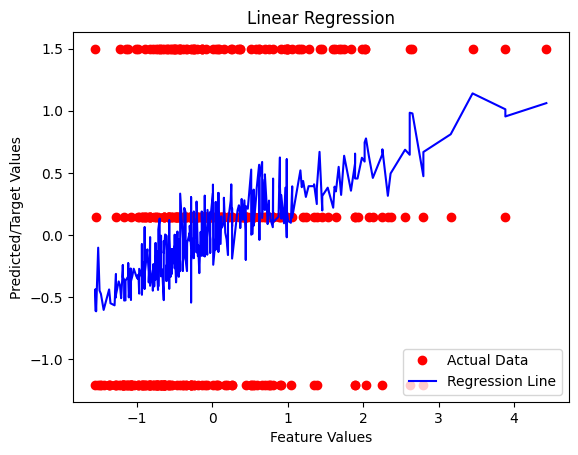

In [187]:
lr.plot(*split_features_target(train))